<a href="https://colab.research.google.com/github/SHodapp117/Portfolio-/blob/main/Statsbomb_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install kloppy
!pip install statsbombpy
!pip install mplsoccer
import pandas as pd
from statsbombpy import sb
from mplsoccer import Pitch
from matplotlib.colors import to_rgba
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from matplotlib.legend_handler import HandlerLine2D
from matplotlib.patches import FancyArrowPatch
from mplsoccer.pitch import VerticalPitch
import matplotlib as mpl
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.sans-serif'] = 'Palatino Linotype'

In [2]:
sb.competitions()
euro_20 = sb.matches(competition_id=55, season_id=43)
euro_20.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3795108,2021-07-02,18:00:00.000,Europe - UEFA Euro,2020,Switzerland,Spain,1,1,available,...,2023-04-27T21:55:08.695971,5,Quarter-finals,Saint-Petersburg Stadium,Michael Oliver,Vladimir Petković,Luis Enrique Martínez García,1.1.0,2,2
1,3788769,2021-06-21,21:00:00.000,Europe - UEFA Euro,2020,Russia,Denmark,1,4,available,...,2023-04-27T22:20:21.686564,3,Group Stage,Parken,Clément Turpin,Stanislav Cherchesov,Kasper Hjulmand,1.1.0,2,2
2,3788766,2021-06-20,18:00:00.000,Europe - UEFA Euro,2020,Italy,Wales,1,0,available,...,2023-04-27T22:22:42.769375,3,Group Stage,Estadio Olímpico,Ovidiu Alin Hațegan,Roberto Mancini,Robert Page,1.1.0,2,2
3,3795220,2021-07-06,21:00:00.000,Europe - UEFA Euro,2020,Italy,Spain,1,1,available,...,2022-08-04T12:00,6,Semi-finals,Wembley Stadium,Felix Brych,Roberto Mancini,Luis Enrique Martínez García,1.1.0,2,2
4,3788761,2021-06-18,15:00:00.000,Europe - UEFA Euro,2020,Sweden,Slovakia,1,0,available,...,2023-04-27T22:28:52.986485,2,Group Stage,Saint-Petersburg Stadium,Daniel Siebert,Jan Olof Andersson,Štefan Tarkovič,1.1.0,2,2


In [3]:
MATCH_id = 3795108
match_events_df = sb.events(match_id=MATCH_id)
match_events_df.head()

,50_50,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_deflection,block_offensive,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,...,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 4231, 'lineup': [{'player': {'id...",Switzerland,773,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Spain,772,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Switzerland,773,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Spain,772,00:00:00.000,Half Start,NaN


In [4]:
match_360_df = pd.read_json('/content/3795108.json')
match_360_df.head()

,event_uuid,visible_area,freeze_frame
0,ea57ee78-a4ef-4d62-81c7-98cdf1c11925,"[120.0, 80.0, 0.0, 80.0, 0.0, 77.9359903100536...","[{'teammate': True, 'actor': False, 'keeper': ..."
1,66655fd3-2764-4532-b1bb-0a01074fed30,"[0.0, 80.0, 0.0, 68.3780973203674, 35.45516025...","[{'teammate': True, 'actor': True, 'keeper': F..."
2,3765b81d-d184-4aff-a532-e9e11228c561,"[0.0, 80.0, 0.0, 68.3780973203674, 35.45516025...","[{'teammate': True, 'actor': True, 'keeper': F..."
3,fdcb6ded-f8be-4fac-8508-cb1fa5c27e7f,"[2.18856831879949, 80.0, 37.9809130991844, 0.0...","[{'teammate': True, 'actor': True, 'keeper': F..."
4,0549751b-8a46-49b1-bd6c-75449b2e46e6,"[13.952798163308, 80.0, 42.7269914891536, 0.0,...","[{'teammate': True, 'actor': False, 'keeper': ..."


In [5]:
df = pd.merge(left=match_events_df, right=match_360_df, left_on='id', right_on='event_uuid', how='left')

location_xy = df.location.apply(pd.Series)
# Save events locations to a Series with 2 columns location_xy = df_pass.location.apply(pd. Series)
# #Rename columns to x and y
location_xy.columns = ['location_x', 'location_y']

# Drop NaN
location_xy.dropna(inplace=True)

# Add new columns back to the original DataFrame
df[['location_x', 'location_y']] = location_xy

Pass_end_xy = df.pass_end_location.apply(pd.Series)

# #Rename columns to x and y
Pass_end_xy.columns = ['pass_end_location_x', 'pass_end_location_y']

# Drop NaN
Pass_end_xy.dropna(inplace=True)

# Add new columns back to the original DataFrame
df[['pass_end_location_x', 'pass_end_location_y']] = Pass_end_xy

Building out the passing network analysis

In [6]:
#filter df to get only the team we want
spain_df = df[df['team']=='Spain']
spain_df['pass_outcome'].fillna('Good', inplace=True)
spain_df.columns

<ipython-input-6-838924b23ff2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain_df['pass_outcome'].fillna('Good', inplace=True)


Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection', 'block_offensive',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head', 'clearance_left_foot', 'clearance_right_foot',
       'counterpress', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_type', 'foul_won_advantage',
       'foul_won_defensive', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_technique',
       'goalkeeper_type', 'id', 'index', 'interception_outcome', 'location',
       'match_id', 'minute', 'miscontrol_aerial_won', 'off_camera', 'out',
       'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_body_part', 'pass_cross', 'pass_cut_back', 'pass_deflected',
       'pass_end_location', 'pass_goal_assist'

In [8]:
spain_playerNumber_position = spain_df[['player', 'player_id','position']].drop_duplicates()

print(spain_playerNumber_position)

                              player  player_id                   position
1                                NaN        NaN                        NaN
12        Álvaro Borja Morata Martín     3477.0             Center Forward
13              Pau Francisco Torres     6892.0           Left Center Back
14                   Aymeric Laporte     4353.0          Right Center Back
15                  Jordi Alba Ramos     5211.0                  Left Back
16              Pablo Sarabia García     6720.0                  Left Wing
26        Jorge Resurrección Merodio     5199.0      Right Center Midfield
31               Unai Simón Mendibil    11748.0                 Goalkeeper
34          Sergio Busquets i Burgos     5203.0  Center Defensive Midfield
35              Ferrán Torres García     6748.0                 Right Wing
36           César Azpilicueta Tanco     3957.0                 Right Back
74              Pedro González López    30486.0       Left Center Midfield
380             Ferrán To

In [33]:
# Create the 'recipient' column by shifting the 'playerId' column by -1
spain_df['passer'] = df['player_id']
spain_df['recipient'] = spain_df['player_id'].shift(-1)

# Filter for only passes
passes = spain_df[spain_df['type'] == 'Pass']
successful_passes = passes[passes['pass_outcome'] == 'Good']

#find the first subsititution and filter the successful dataframe to be less than that minute
substitution_minutes = spain_df.loc[spain_df['type'] == 'Substitution', 'minute']
substitution_minutes = substitution_minutes.to_list()

successful_passes = successful_passes[successful_passes['minute'] <= substitution_minutes[0]]

#now we need to find the average locations and counts of the passes
average_locations = successful_passes.groupby('passer').agg({'location_x':['mean'],'location_y':['mean','count']})
average_locations.columns = ['x','y','count']

#now we need to find the number of passes between each player
pass_between = successful_passes.groupby(['passer','recipient']).id.count().reset_index()
pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

#merge the average location dataframe. We need to merge on the passer first then the recipient
pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['', '_end'])

#set minimum threshold of combinationsI have seen a range of 2-5 as Spain is a pass heavy team I opted for 4
pass_between = pass_between[pass_between['pass_count'] > 3]



<ipython-input-33-976e2ff06b4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain_df['passer'] = df['player_id']
<ipython-input-33-976e2ff06b4d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spain_df['recipient'] = spain_df['player_id'].shift(-1)


In [48]:
# Replace MAX_LINE_WIDTH and MAX_MARKER_SIZE with your desired maximum values.
MAX_LINE_WIDTH = 18
MAX_MARKER_SIZE = 3000

# Replace 'passes_between' with your dataframe containing pass count data.
pass_between['width'] = (pass_between['pass_count'] / pass_between['pass_count'].max() *
                           MAX_LINE_WIDTH)

# Replace 'average_locs_and_count' with your dataframe containing count data.
average_locations['marker_size'] = (average_locations['count']
                                         / average_locations['count'].max() * MAX_MARKER_SIZE)



In [42]:
MIN_TRANSPARENCY = 0.3
color = np.array(to_rgba('white'))
color = np.tile(color, (len(pass_between), 1))
c_transparency = pass_between.pass_count / pass_between.pass_count.max()
c_transparency = (c_transparency * (1 - MIN_TRANSPARENCY)) + MIN_TRANSPARENCY
color[:, 3] = c_transparency

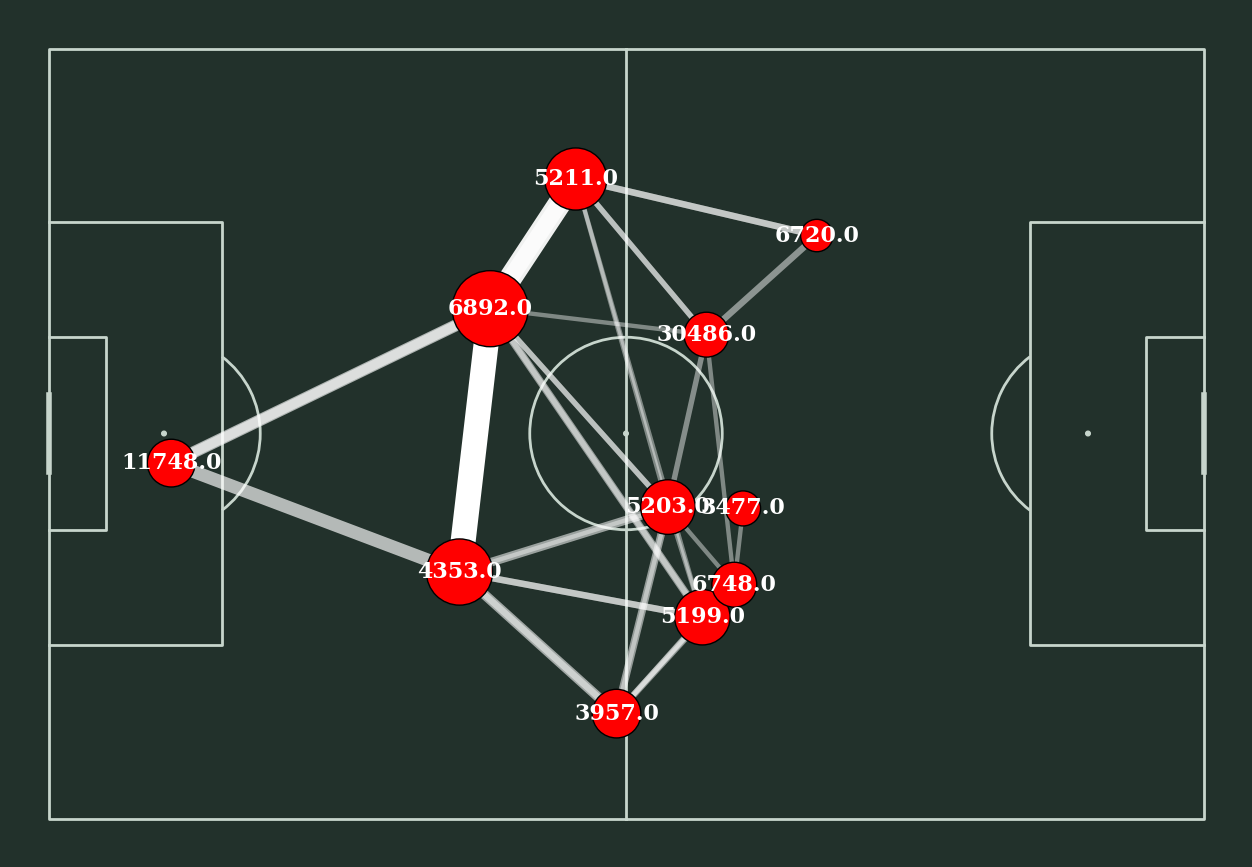

In [44]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 11), constrained_layout=True, tight_layout=False)
fig.set_facecolor("#22312b")
pass_lines = pitch.lines(pass_between.x, pass_between.y,
                         pass_between.x_end, pass_between.y_end, lw=pass_between.width,
                         color=color, zorder=1, ax=ax)
pass_nodes = pitch.scatter(average_locations.x, average_locations.y,
                           s=average_locations.marker_size,
                           color='red', edgecolors='black', linewidth=1, alpha=1, ax=ax)
for index, row in average_locations.iterrows():
    pitch.annotate(row.name, xy=(row.x, row.y), c='white', va='center',
                   ha='center', size=16, weight='bold', ax=ax)

In [49]:
average_locations

,x,y,count,marker_size
passer,,,,
3477.0,72.164286,47.785714,14,636.363636
3957.0,59.014815,69.103704,27,1227.272727
4353.0,42.704000,54.394000,50,2272.727273
5199.0,67.937143,59.091429,35,1590.909091
5203.0,64.355882,47.644118,34,1545.454545
5211.0,54.779545,13.559091,44,2000.000000
6720.0,79.825000,19.433333,12,545.454545
6748.0,71.252174,55.708696,23,1045.454545
6892.0,45.892424,27.033333,66,3000.000000


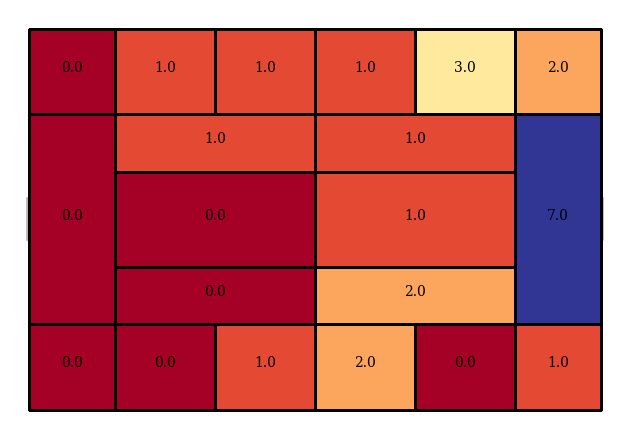

In [34]:
spain_df_pass = spain_df.loc[(spain_df['type'] == 'Pass') & (spain_df['pass_switch'] == True)]

# Pitch setup
pitch = Pitch(pitch_type='statsbomb')

# Alternative method using mpl soccer documentation
fig, ax = pitch.draw()
x = spain_df_pass['pass_end_location_x'].values
y = spain_df_pass['pass_end_location_y'].values
stats = pitch.bin_statistic_positional(x, y)
pitch.heatmap_positional(stats, edgecolors='black', cmap='RdYlBu', ax=ax)
text = pitch.label_heatmap(stats, color='black', ax=ax, fontsize=10, ha='center')

plt.show()